In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load in Dataset
df = pd.read_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Processed/unique_officers.csv")

In [3]:
# Get Columns
print(df.columns)

Index(['OfficerID', 'OfficerFirst', 'OfficerLast', 'Gender', 'Race',
       'ApptDate', 'Unit', 'Rank', 'Star', 'Age', 'Beat', 'num_allegations'],
      dtype='object')


In [4]:
# Drop Columns
df = df.drop(columns=['OfficerFirst', 'OfficerLast', 'Unit', "Star"])

In [5]:
print(df.isnull())
# get index of rows with null values
null_data = df[df.isnull().any(axis=1)]
print(null_data)
# drop rows with null values
df = df.dropna()
print(df)

      OfficerID  Gender   Race  ApptDate   Rank    Age   Beat  num_allegations
0         False   False  False     False  False  False  False            False
1         False   False  False     False  False  False  False            False
2         False   False  False     False  False  False  False            False
3         False   False  False     False  False  False  False            False
4         False   False  False     False  False  False  False            False
...         ...     ...    ...       ...    ...    ...    ...              ...
9396      False   False  False     False   True  False  False            False
9397      False   False  False      True   True  False  False            False
9398      False   False  False      True   True  False  False            False
9399      False   False  False      True   True  False  False            False
9400      False   False  False      True   True  False  False            False

[9401 rows x 8 columns]
      OfficerID Gender     

In [6]:
target = df["num_allegations"]
data = df.drop(columns=["num_allegations"])
print(data, target)

      OfficerID Gender           Race  ApptDate                Rank  Age  \
0             1      M          White   38621.0  Sergeant Of Police   51   
1             2      F       Hispanic   38621.0      Police Officer   42   
2             7      M          White   35037.0      Police Officer   50   
3            13      M          White   30284.0      Police Officer   69   
4            16      M  Asian/Pacific   39566.0      Police Officer   38   
...         ...    ...            ...       ...                 ...  ...   
9390      32138      M          White   35675.0  Sergeant Of Police   59   
9391      32140      M          White   34456.0                  Po   53   
9392      32298      M          White   36696.0                  Po   45   
9393      32300      M          White   36584.0                 Det   46   
9394      32354      M  Asian/Pacific   38285.0                  Po   43   

        Beat  
0     1121.0  
1     1511.0  
2     1613.0  
3     1655.0  
4      832.0

In [7]:
# Use one hot encoding on the columns: Gender, Race, Rank
enc = OneHotEncoder(handle_unknown='ignore')
temp_df = data[["Gender", "Race", "Rank"]]
enc_df = pd.DataFrame(enc.fit_transform(temp_df).toarray())
# drop index column
enc_df = enc_df.drop(columns=[0])
print(enc_df)

       1    2    3    4    5    6    7    8    9    10  ...   30   31   32  \
0     1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9376  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9377  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9378  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9379  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9380  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       33   34   35   36   37   38   39  
0     0.0  0.0  0.0  

In [8]:
# join with the original dataframe, index column is the common column
data = data.join(enc_df, how='left')
data = data.drop(columns=["Gender", "Race", "Rank"])
print(data)

      OfficerID  ApptDate  Age    Beat    1    2    3    4    5    6  ...  \
0             1   38621.0   51  1121.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
1             2   38621.0   42  1511.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   
2             7   35037.0   50  1613.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
3            13   30284.0   69  1655.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
4            16   39566.0   38   832.0  1.0  1.0  0.0  0.0  0.0  0.0  ...   
...         ...       ...  ...     ...  ...  ...  ...  ...  ...  ...  ...   
9390      32138   35675.0   59  1112.0  NaN  NaN  NaN  NaN  NaN  NaN  ...   
9391      32140   34456.0   53   522.0  NaN  NaN  NaN  NaN  NaN  NaN  ...   
9392      32298   36696.0   45   421.0  NaN  NaN  NaN  NaN  NaN  NaN  ...   
9393      32300   36584.0   46  1923.0  NaN  NaN  NaN  NaN  NaN  NaN  ...   
9394      32354   38285.0   43  1513.0  NaN  NaN  NaN  NaN  NaN  NaN  ...   

       30   31   32   33   34   35   36   37   38   39  
0     0.0  0.0  0.

In [9]:
# frequency encoding on the column Beat
beat_freq = data["Beat"].value_counts()
data["Beat"] = data["Beat"].map(beat_freq)

officerid = data["OfficerID"].value_counts()
data["OfficerID"] = data["OfficerID"].map(officerid)

# divide ApptDate column by 1000
data["ApptDate"] = data["ApptDate"] / 1000

# combine data and target
data = data.join(target, how='left')
# drop rows with null values
data = data.dropna()
# separate data and target
target = data["num_allegations"]
data = data.drop(columns=["num_allegations"])


In [18]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
# get mean squrared error
print(np.mean((lr.predict(X_test) - y_test)**2))


0.06574998603396431
11.11215371773504


/Users/jeremyhudsonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/jeremyhudsonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/jeremyhudsonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


/Users/jeremyhudsonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


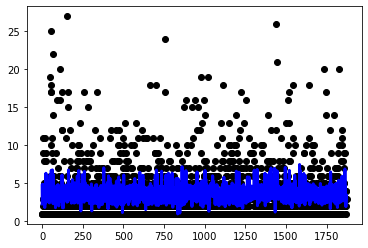

In [21]:
# plot linear regression
plt.scatter(np.arange(0, len(X_test)),y_test, color='black')
plt.plot(np.arange(0, len(X_test)), lr.predict(X_test), color='blue', linewidth=3)
plt.show()